In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc
from datetime import datetime, timedelta 

#from sqlalchemy.ext.declarative import declarative_base
#from pathlib import Path

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date_row = session.query(Measurement.date).order_by(desc(Measurement.date)).first()

most_recent_date = most_recent_date_row[0]

most_recent_date

'2017-08-23'

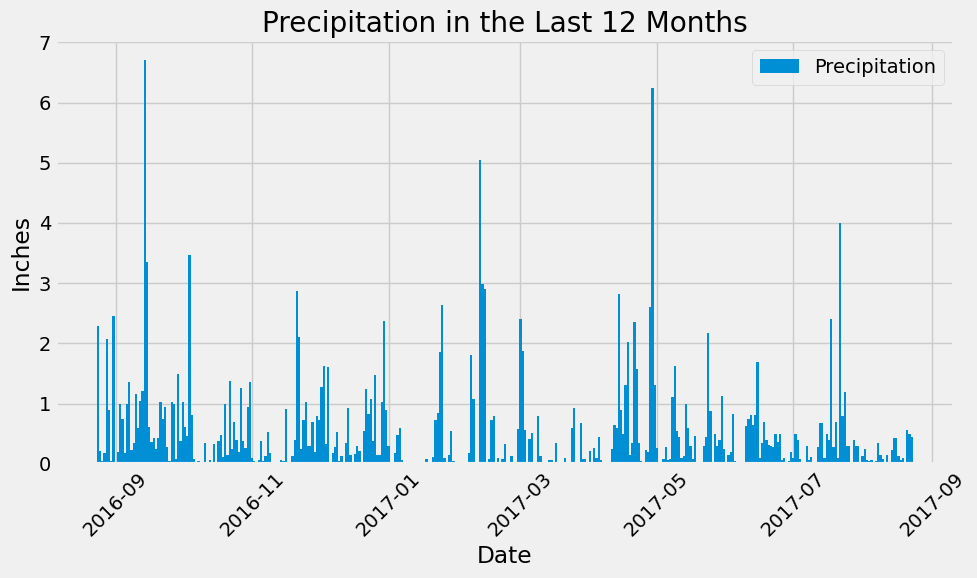

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = datetime.strptime(most_recent_date, "%Y-%m-%d")- timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= one_year_ago)\
    .order_by(Measurement.date).all()
precipitation_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns =['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df.sort_values('date', inplace=True)

precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.bar(precipitation_df['date'], precipitation_df['precipitation'], width=1.0)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation in the Last 12 Months')
plt.legend(['Precipitation'])
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.set_index('date', inplace=True)
precipitation_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
station_data = session.query(Station.station).count()
station_data

9

In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .all()

# Print the results
most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Station.name, func.count(Measurement.station))\
    .join(Measurement, Measurement.station == Station.station)\
    .group_by(Station.name)\
    .order_by(func.count(Measurement.station).desc())\
    .all()

# Print the results
for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")

Station: WAIHEE 837.5, HI US, Count: 2772
Station: WAIKIKI 717.2, HI US, Count: 2724
Station: KANEOHE 838.1, HI US, Count: 2709
Station: WAIMANALO EXPERIMENTAL FARM, HI US, Count: 2669
Station: MANOA LYON ARBO 785.2, HI US, Count: 2612
Station: KUALOA RANCH HEADQUARTERS 886.9, HI US, Count: 2202
Station: HONOLULU OBSERVATORY 702.2, HI US, Count: 1979
Station: PEARL CITY, HI US, Count: 1372
Station: UPPER WAHIAWA 874.3, HI US, Count: 511


In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Waihee_station = 'USC00519281'  

Waihee_station_data = session.query(func.min(Measurement.tobs),
                                    func.max(Measurement.tobs),
                                    func.avg(Measurement.tobs))\
                            .filter(Measurement.station == Waihee_station)\
                            .all()
print("Lowest Temperature:", Waihee_station_data[0][0])
print("Highest Temperature:", Waihee_station_data[0][1])
print("Average Temperature:", Waihee_station_data[0][2])

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


In [43]:
one_year_ago = datetime.strptime(most_recent_date, "%Y-%m-%d")- timedelta(days=365)
one_year_ago

datetime.datetime(2016, 8, 23, 0, 0)

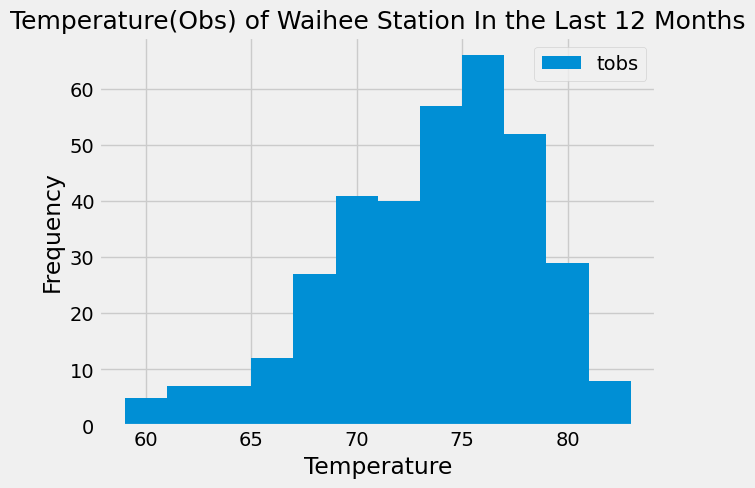

In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_ago = datetime.strptime(most_recent_date, "%Y-%m-%d")- timedelta(days=365)

Waihee = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == Waihee_station)\
    .filter(Measurement.date >= one_year_ago)\
    .order_by(Measurement.date).all()

Waihee_df = pd.DataFrame(Waihee)
 
# Plot a histogram 
Waihee_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.title('Temperature(Obs) of Waihee Station In the Last 12 Months', fontsize=18)
plt.show()

In [39]:
one_year_ago = datetime.strptime(most_recent_date, "%Y-%m-%d")- timedelta(days=365)

Waihee = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == Waihee_station)\
    .filter(Measurement.date >= one_year_ago)\
    .order_by(Measurement.date).all()
Waihee

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

# Close Session

In [16]:
# Close Session
session.close()